In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotnine import *

def read_sample_chroms(sample):
    data_dir = f"../processed-data/admixfrog-allentoft/{sample}"

    singlechroms = []
    for i in range(1, 23):
        file_i = f"{data_dir}/{i}.rle.xz"
        if os.path.exists(file_i):
            df_i = pd.read_csv(file_i)
            singlechroms.append(df_i)
        else:
            print(f"Sample {sample}: No result file for chrom {i}")

    df = pd.concat(singlechroms)
    # Filter to remove the state annotations
    df = df.loc[df["type"] != "state"]
    # Remove any archaic calls that are shorter than 0.05 cM
    min_len = .05
    df = df.drop(df.loc[(df['map_len']  < min_len) & (df['target'] != 'AFR')].index)
    return df

def plot_introgression(sample, df=None):
    # Create a dataframe of chromosome lengths for plotting
    chrom_lens = {
        1 : 249_250_621,
        2 : 243_199_373,
        3 : 198_022_430,
        4 : 191_154_276,
        5 : 180_915_260,
        6 : 171_115_067,
        7 : 159_138_663,
        # X : 155_270_560,
        8 : 146_364_022,
        9 : 141_213_431,
        10 : 135_534_747,
        11 : 135_006_516,
        12 : 133_851_895,
        13 : 115_169_878,
        14 : 107_349_540,
        15 : 102_531_392,
        16 : 90_354_753,
        17 : 81_195_210,
        18 : 78_077_248,
        20 : 63_025_520,
        # Y : 59_373_566,
        19 : 59_128_983,
        22 : 51_304_566,
        21 : 48_129_895,
        }
    chromosomes = pd.DataFrame([chrom_lens]).T.reset_index()
    chromosomes.columns = ['chrom', 'length']
    chromosomes['x'] = 0

    # color map for plotting
    colormap = {
        'AFR' : "lightgrey", 
        'NEA' : "c", 
        'DEN' : "y", 
        'AFRNEA' : "magenta", 
        'AFRDEN' : "purple", 
        'NEADEN' : "green",
    }
    if df is None:
        df = read_sample_chroms(sample)
    p1 = (
        ggplot()
        + geom_segment(
            aes(x='x', xend='length', y='chrom', yend='chrom'), 
            data=chromosomes, 
            color='grey', alpha=.2, size=5)
        + geom_segment(
            aes(x='pos', xend='pos_end', y='chrom', yend='chrom', color='target'), 
            size=5,
            data=df[df['target'] != "AFR"])
        + scale_color_manual(values=colormap)
        + scale_y_continuous(breaks=range(1, 23))
        + labs(x="Position [bp]", y="Chromosome", color="Ancestry", title=sample)
        + theme_bw()
        + theme(panel_grid_major=element_blank(),  # Remove major gridlines
                panel_grid_minor=element_blank(),
                panel_border=element_blank())
    )


    p1.show()


In [195]:
os.listdir("../processed-data/admixfrog-allentoft/")

['Ma554', 'Ardu2', 'La727', 'Ardu1', 'IVLS09KT', 'NEO306', 'X15', 'DA337']

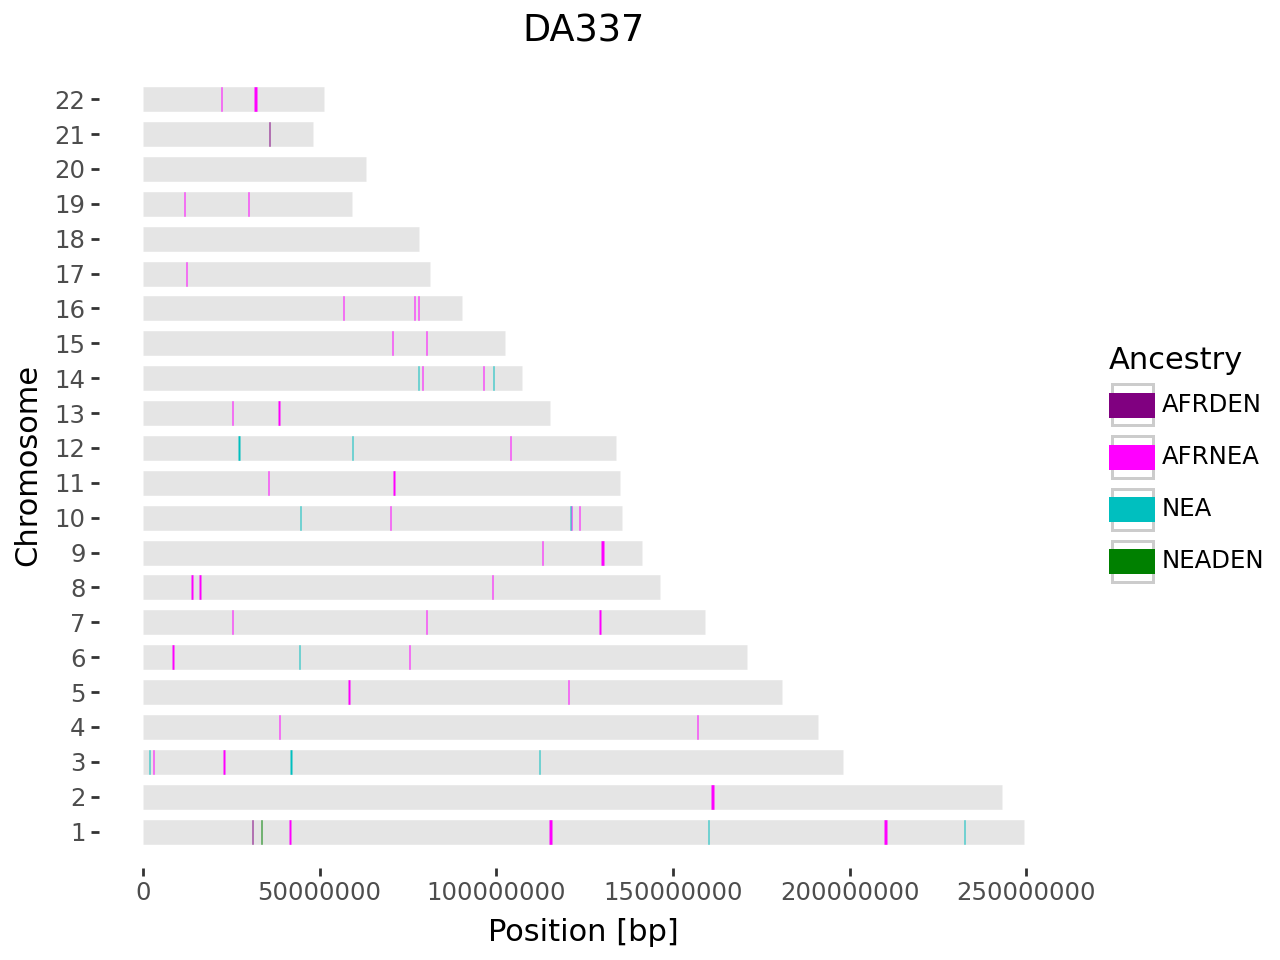

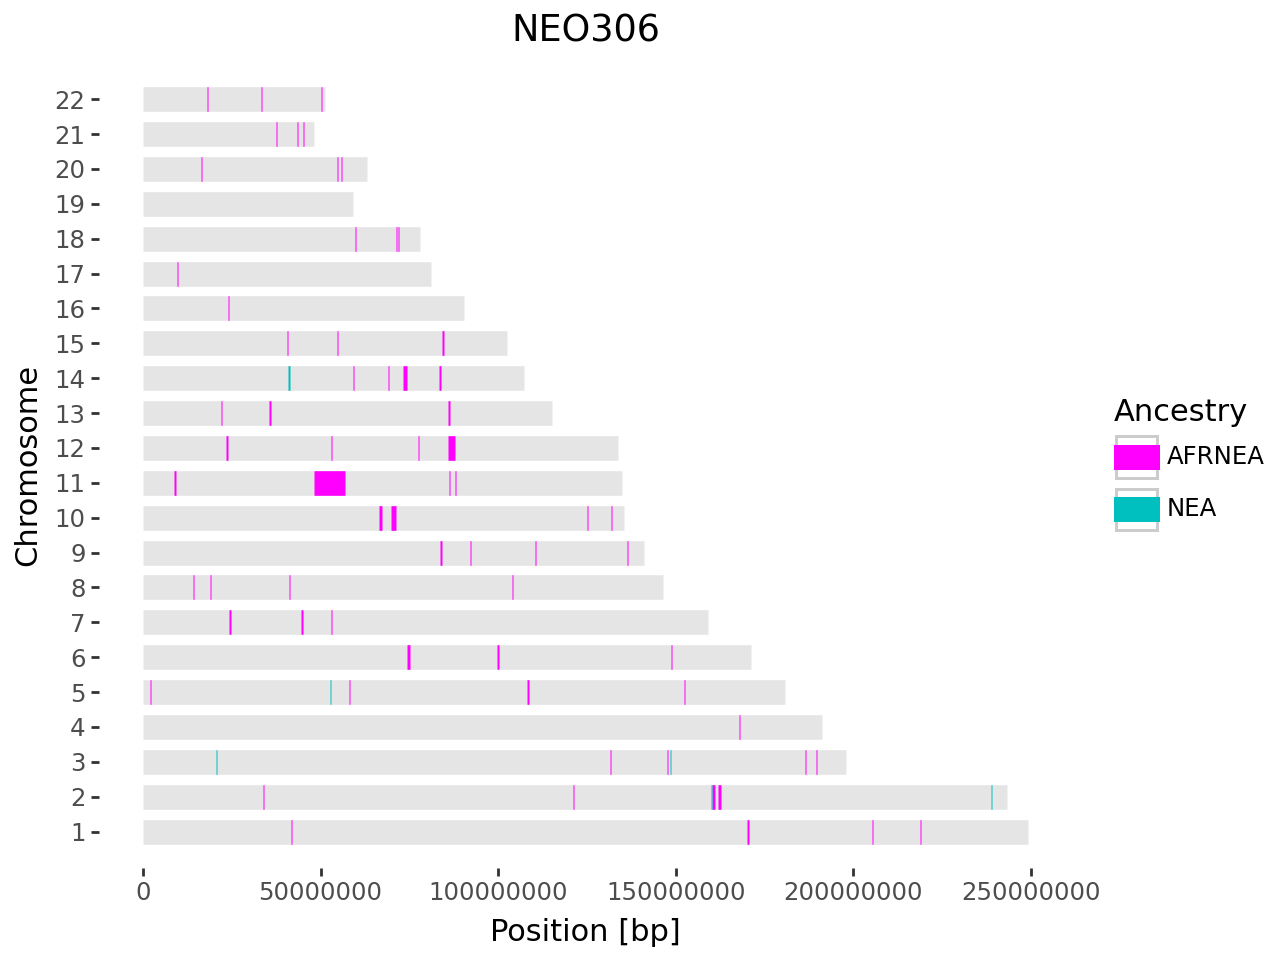

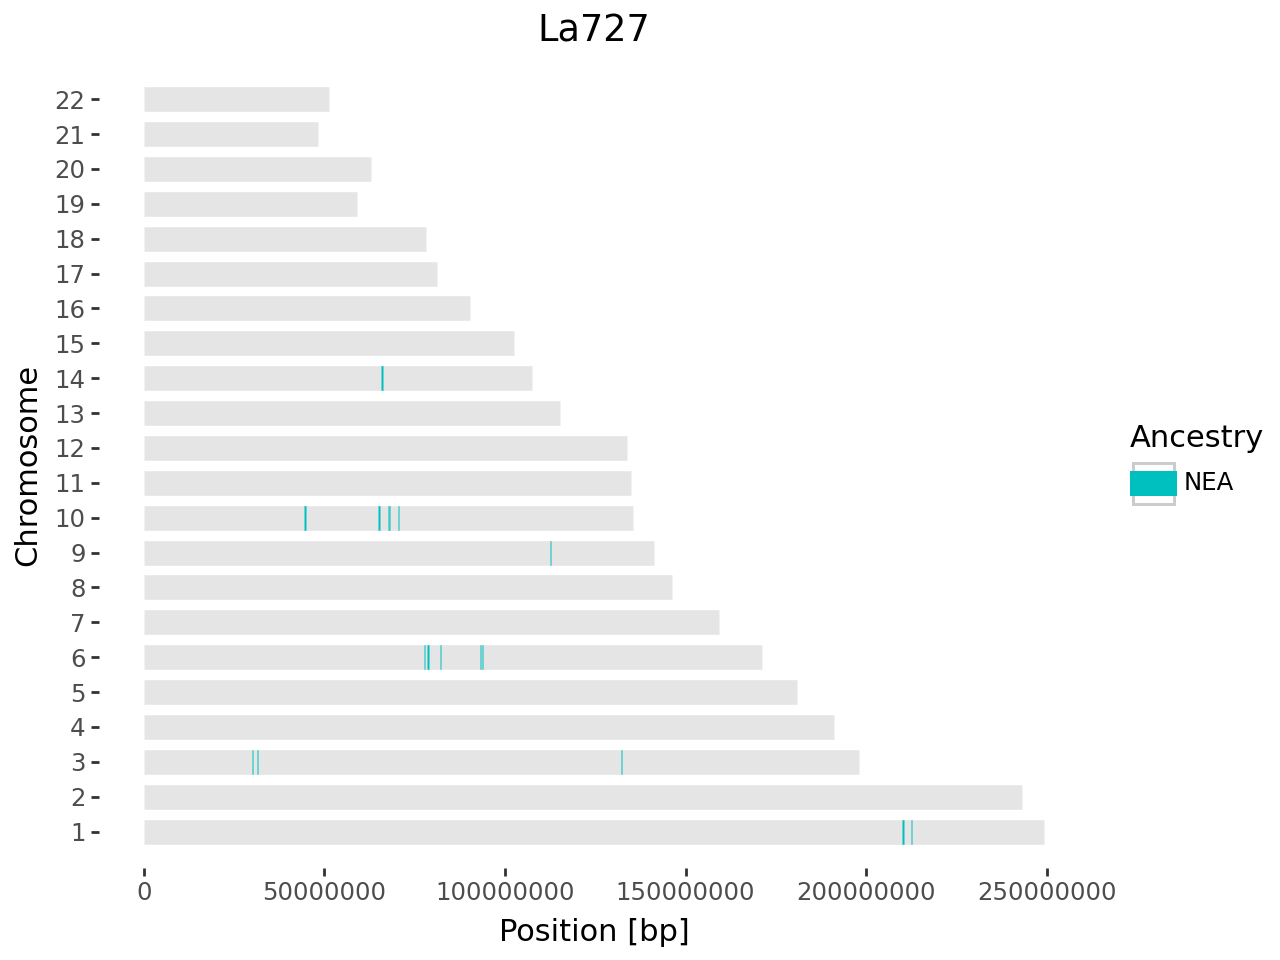

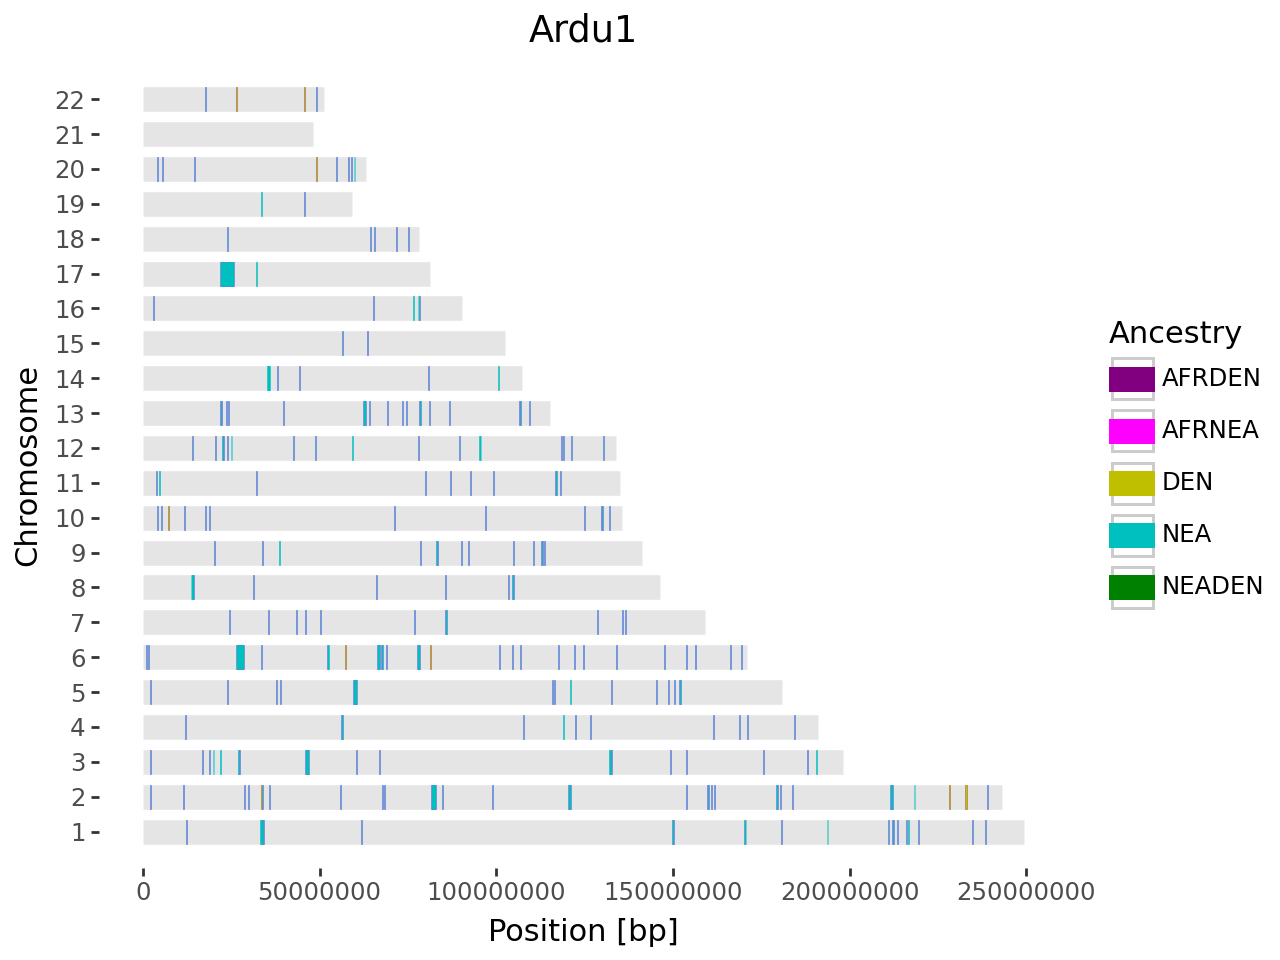

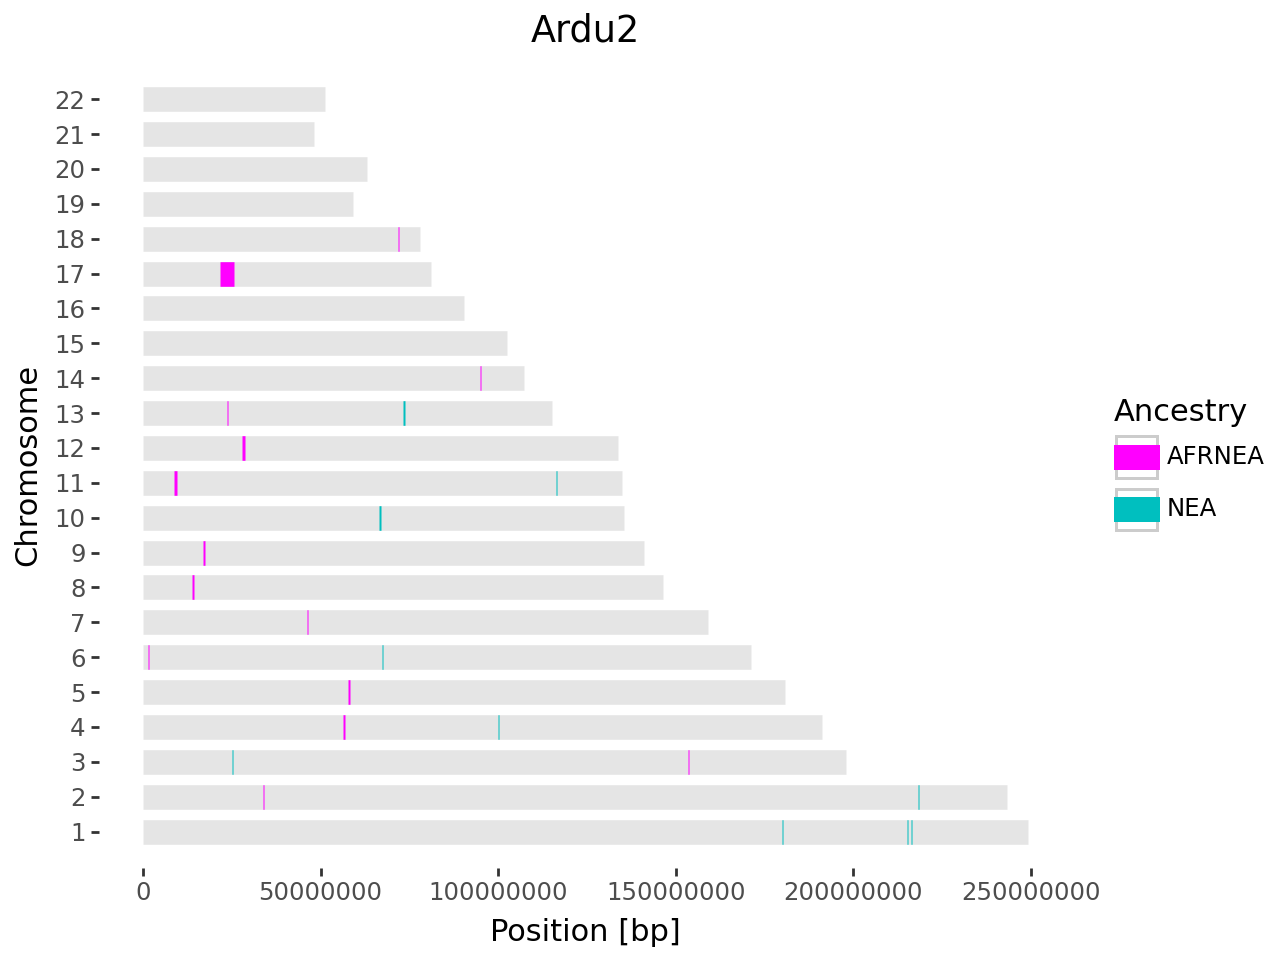

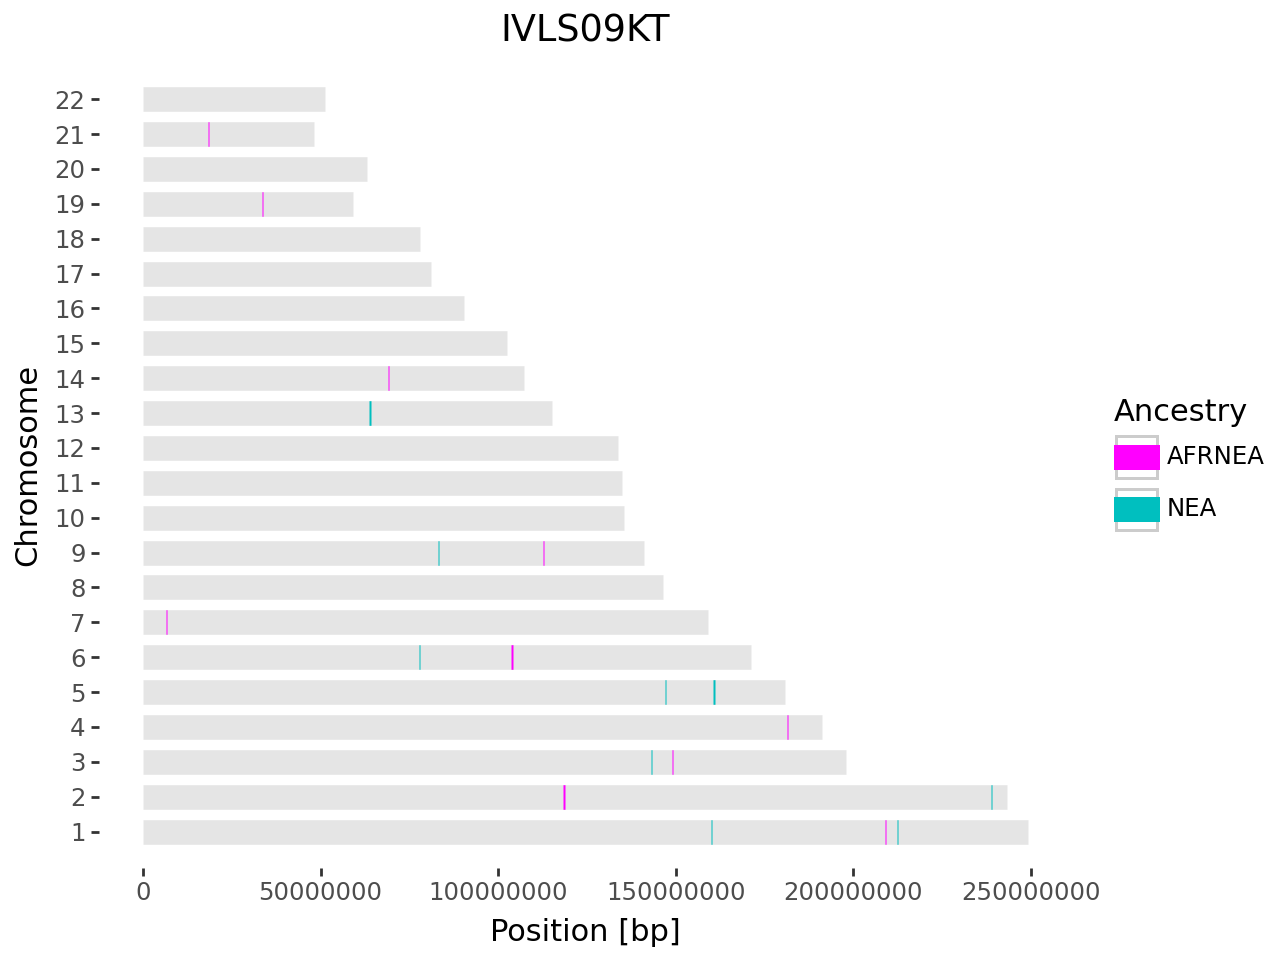

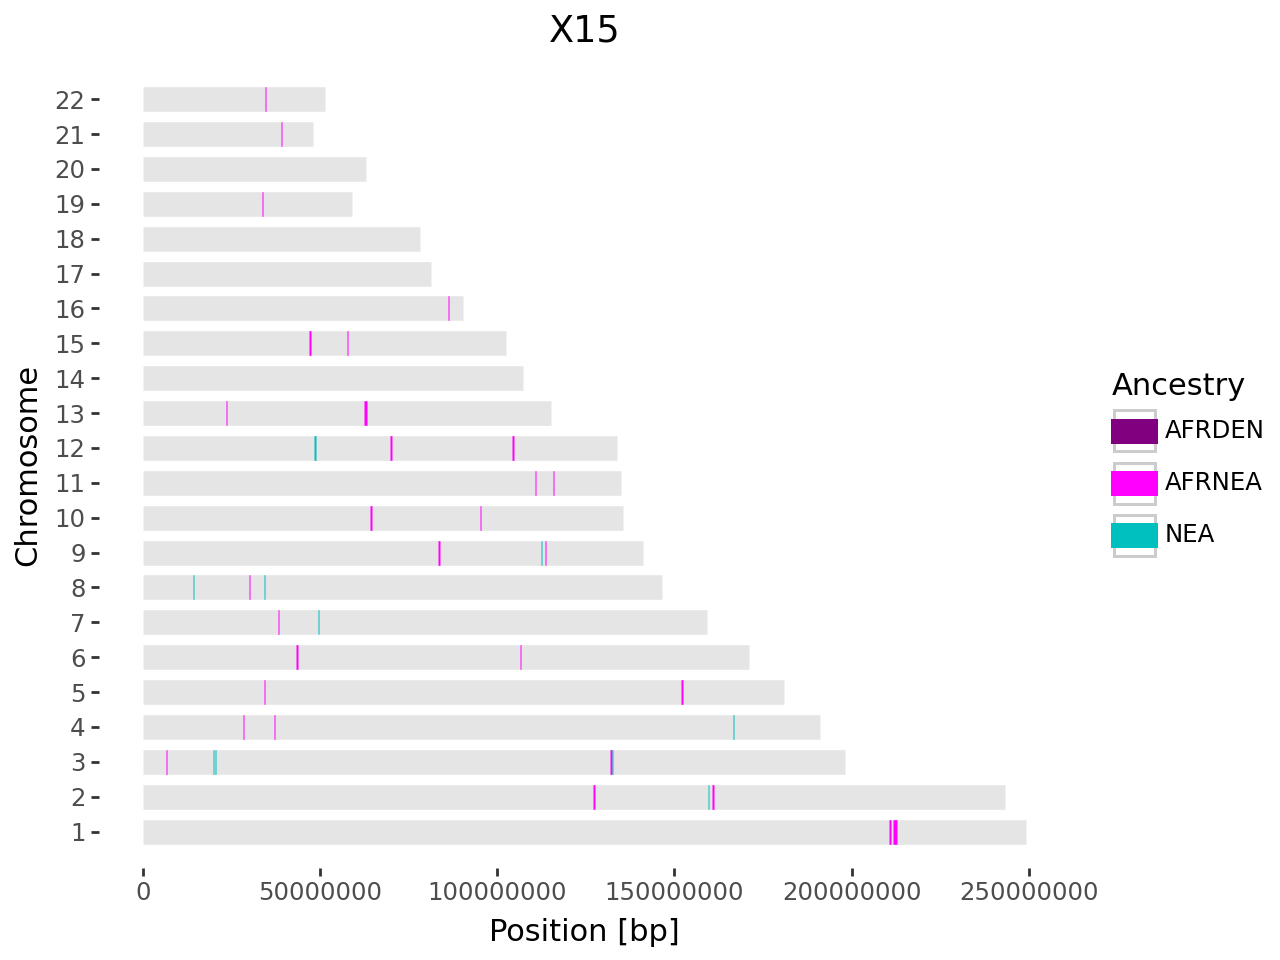

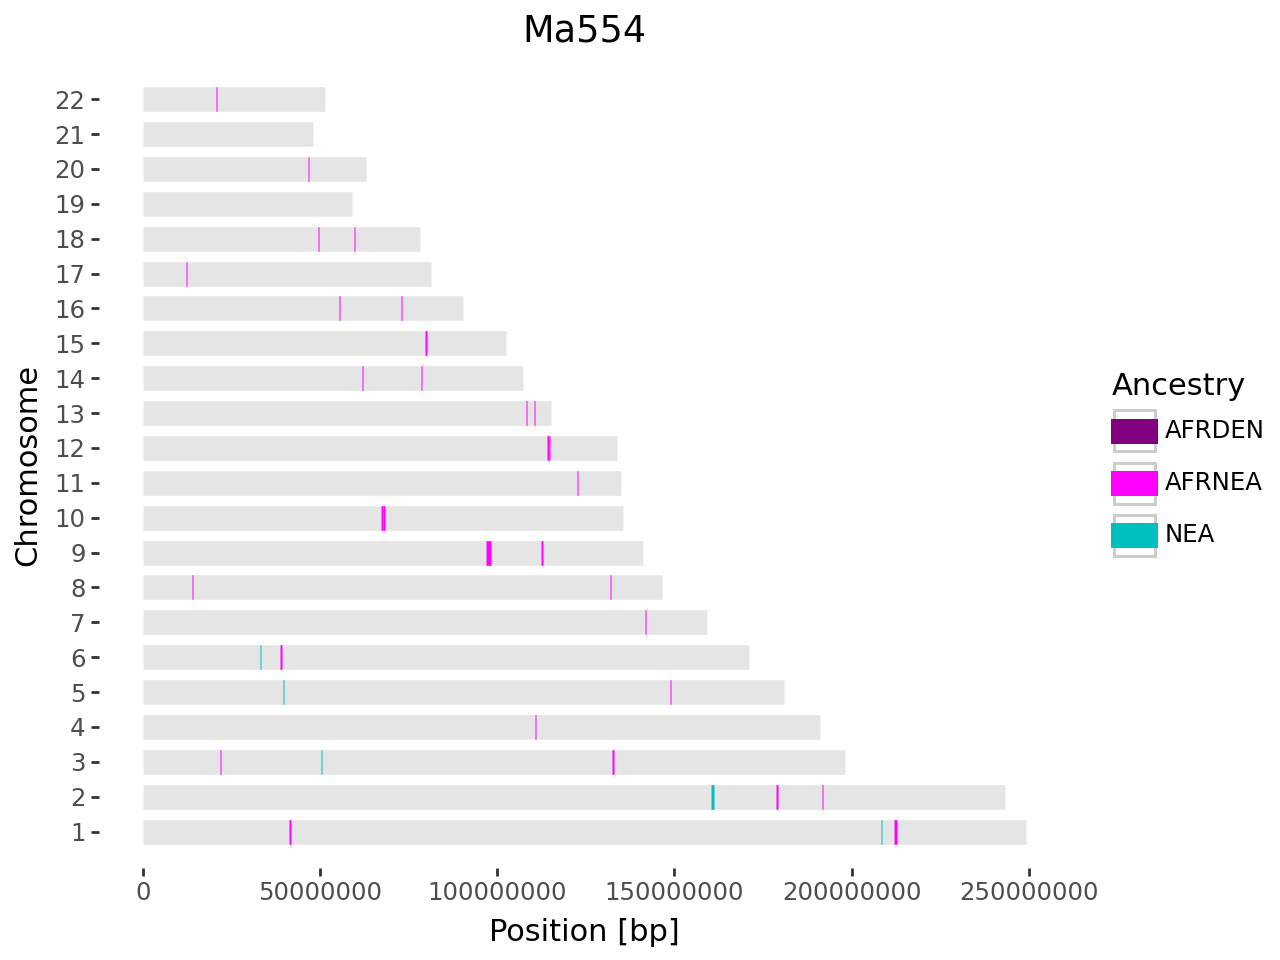

In [196]:
plot_introgression("DA337")
plot_introgression("NEO306")
plot_introgression("La727")
plot_introgression("Ardu1", df = pd.read_csv(f"../processed-data/admixfrog-allentoft/Ardu1/Ardu1.rle.xz"))
plot_introgression("Ardu2")
plot_introgression('IVLS09KT')
plot_introgression('X15')
plot_introgression('Ma554')

In [183]:
# type(None)
# type(pd.read_csv(f"../processed-data/admixfrog-allentoft/Ardu1/Ardu1.rle.xz"))
x = None
print(type(x))
x = 1
print(type(x))

<class 'NoneType'>
<class 'int'>
